## 1

The linear regression equation expresses the linear relationship between the independent variable 
𝑋 and the dependent variable 𝑌, in the form: 

𝑌 = 𝛽0 +𝛽1𝑋 + 𝜖

where 𝑌 is the expected value, 𝛽0 is the intercept, representing the expected value of 𝑌 when 𝑋 = 0, 𝛽1 is the slope, indicating the change in 𝑌 for each one-unit increase in 𝑋 and 𝜖 is the error term, representing random error or noise that accounts for the unexplained variability in the data.

In simple linear regression, each 𝑌 value consists of the predicted value 
𝛽0 + 𝛽1𝑋 and an error term ϵ, where ϵ follows a normal distribution with mean 0 and variance 𝜎². Thus, given 𝑋, 𝑌 also follows a normal distribution with mean 𝛽0 + 𝛽1𝑋 and variance 𝜎². This means each 𝑌 value is a sample from a normal distribution centered at 𝛽0 + 𝛽1𝑋.

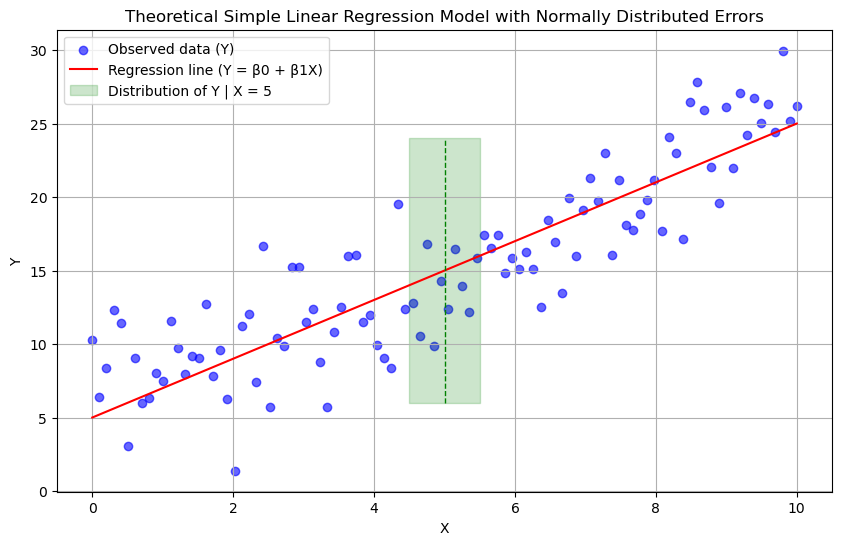

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set parameters for the regression model
beta_0 = 5      # Intercept
beta_1 = 2      # Slope
sigma = 3       # Standard deviation of the error term

# Generate some sample X values
np.random.seed(0)
X = np.linspace(0, 10, 100)

# Generate the corresponding Y values based on the Simple Linear Regression model
# Y = beta_0 + beta_1 * X + epsilon, where epsilon ~ N(0, sigma^2)
epsilon = np.random.normal(0, sigma, size=X.shape)
Y = beta_0 + beta_1 * X + epsilon

# Plot the sample points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label="Observed data (Y)", color="blue", alpha=0.6)

# Calculate the theoretical mean of Y for each X (the regression line)
Y_mean = beta_0 + beta_1 * X
plt.plot(X, Y_mean, label="Regression line (Y = β0 + β1X)", color="red")

# Plot the normal distribution of Y for a specific value of X
X_value = 5
Y_mean_at_X = beta_0 + beta_1 * X_value
Y_distribution = norm(loc=Y_mean_at_X, scale=sigma)

# Generate a range of Y values around the mean for plotting
Y_range = np.linspace(Y_mean_at_X - 3 * sigma, Y_mean_at_X + 3 * sigma, 100)
Y_prob = Y_distribution.pdf(Y_range)

# Plot the probability density function for Y | X = 5
plt.plot([X_value] * len(Y_range), Y_range, 'g--', linewidth=1)
plt.fill_betweenx(Y_range, X_value - 0.5, X_value + 0.5, where=(Y_range >= Y_range[0]) & (Y_range <= Y_range[-1]), 
                  color='green', alpha=0.2, label=f"Distribution of Y | X = {X_value}")

# Add labels and legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Theoretical Simple Linear Regression Model with Normally Distributed Errors")
plt.legend()
plt.grid(True)
plt.show()


## 2

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     335.2
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           2.14e-33
Time:                        01:02:22   Log-Likelihood:                -252.17
No. Observations:                 100   AIC:                             508.3
Df Residuals:                      98   BIC:                             513.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6254      0.604      9.313      0.0

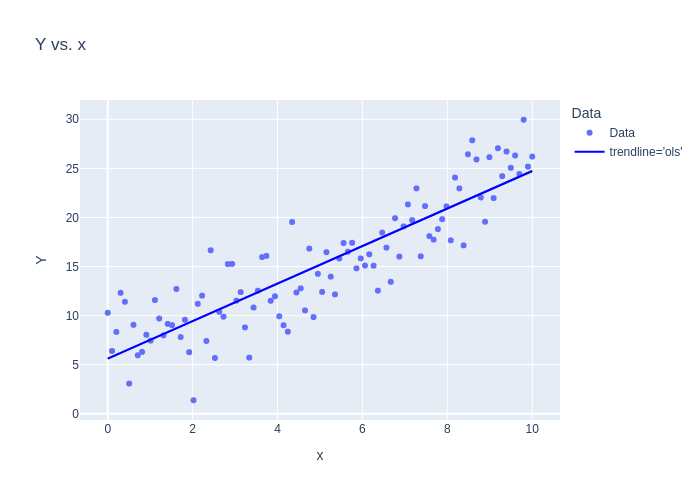

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf

# Simulate data for the Simple Linear Regression model
np.random.seed(0)  # for reproducibility
n = 100  # number of data points
x = np.linspace(0, 10, n)  # independent variable
beta_0 = 5  # intercept
beta_1 = 2  # slope
sigma = 3  # standard deviation of error term

# Generate random noise and calculate dependent variable Y
epsilon = np.random.normal(0, sigma, size=n)
y = beta_0 + beta_1 * x + epsilon

# Create a DataFrame with the simulated data
df = pd.DataFrame({'x': x, 'Y': y})

# Specify and fit the Simple Linear Regression model
model_data_specification = smf.ols("Y ~ x", data=df) 
fitted_model = model_data_specification.fit()

# Print model summary
print(fitted_model.summary())

# Extract specific details
print("\nCoefficient Table:")
print(fitted_model.summary().tables[1])  # table of estimated coefficients

print("\nEstimated Parameters (Intercept and Slope):")
print(fitted_model.params)

print("\nEstimated Parameters as Array:")
print(fitted_model.params.values)

print("\nR-squared Value:")
print(fitted_model.rsquared)

# Plot the data with plotly and add a regression line
# Adding a constant column to display data label in the legend
df['Data'] = 'Data'  # adds a label for all points for the color grouping

# Scatter plot with an OLS trendline
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Manually adding the trendline using fitted values from the model
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

# Display the figure with PNG renderer for compatibility
fig.show(renderer="png")  # use this renderer for compatibility with static outputs like GitHub


## 3

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     335.2
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           2.14e-33
Time:                        01:03:30   Log-Likelihood:                -252.17
No. Observations:                 100   AIC:                             508.3
Df Residuals:                      98   BIC:                             513.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6254      0.604      9.313      0.0

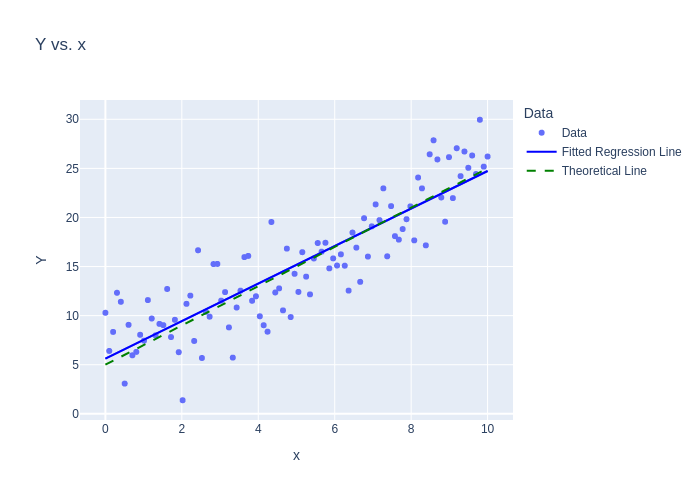

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf

# Simulate data for the Simple Linear Regression model
np.random.seed(0)  # for reproducibility
n = 100  # number of data points
x = np.linspace(0, 10, n)  # independent variable
beta_0 = 5  # intercept for the theoretical model
beta_1 = 2  # slope for the theoretical model
sigma = 3  # standard deviation of error term

# Generate random noise and calculate dependent variable Y
epsilon = np.random.normal(0, sigma, size=n)
y = beta_0 + beta_1 * x + epsilon

# Create a DataFrame with the simulated data
df = pd.DataFrame({'x': x, 'Y': y})

# Specify and fit the Simple Linear Regression model
model_data_specification = smf.ols("Y ~ x", data=df) 
fitted_model = model_data_specification.fit()

# Print model summary
print(fitted_model.summary())

# Extract specific details
print("\nCoefficient Table:")
print(fitted_model.summary().tables[1])  # table of estimated coefficients

print("\nEstimated Parameters (Intercept and Slope):")
print(fitted_model.params)

print("\nEstimated Parameters as Array:")
print(fitted_model.params.values)

print("\nR-squared Value:")
print(fitted_model.rsquared)

# Plot the data with plotly and add a regression line
# Adding a constant column to display data label in the legend
df['Data'] = 'Data'  # adds a label for all points for the color grouping

# Scatter plot with an OLS trendline
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Manually adding the fitted regression line using fitted values from the model
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="Fitted Regression Line")

# Adding the theoretical line (from Question 1) based on beta_0 and beta_1
theoretical_y = beta_0 + beta_1 * df['x']
fig.add_scatter(x=df['x'], y=theoretical_y,
                line=dict(color='green', dash='dash'), name="Theoretical Line")

# Display the figure with PNG renderer for compatibility
fig.show(renderer="png")  # use this renderer for compatibility with static outputs like GitHub


The theoretical line is based on preset model parameters and does not consider the error term, representing the ideal relationship between 𝑌 and 𝑋. The fitted regression line, however, is calculated using data that includes errors, reflecting the random variation in the actual data. The key difference is that the theoretical line shows the expected relationship, while the fitted regression line is more aligned with the real data.

## 4


fitted_model.fittedvalues are the fitted values calculated based on the estimated model parameters (the intercept 
𝛽0 and slope 𝛽1 in fitted_model.params). Specifically, each fitted value 𝑌^ is calculated using the formula：

𝑌^ = 𝛽0 + 𝛽1𝑋

where each 𝑋𝑖 from the data is substituted into this formula to get the corresponding predicted 𝑌 value. These fitted values represent the model’s predictions at each 𝑋.

## 5

In the "ordinary least squares" (OLS) method, the fitted line chosen is the one that minimizes the sum of squared residuals between the observed 𝑌 and predicted 𝑌^ values. There are two main reasons for using "squares": first, it treats both positive and negative residuals as positive values, preventing them from canceling each other out; second, it simplifies the mathematical calculations, allowing us to directly minimize the sum of squared residuals to find the best-fit intercept and slope. Thus, the OLS method yields the line that best fits the observed data.

## 6

The first expression represents the proportion of variation in 𝑌 explained by the model, which is the 𝑅². Here, the denominator is the total variation in 𝑌, and the numerator is the residual variation not explained by the model. Subtracting this ratio from 1 gives the proportion of 𝑌 variation explained by the model, which measures the model's goodness of fit.

fitted_model.rsquared can be interpreted as the model's accuracy because it represents the proportion of variation in the outcome variable 𝑌 explained by the model. The closer the 𝑅² value is to 1, the better the model explains the variation in 𝑌, indicating a higher degree of fit and greater accuracy.

## 7

The assumption of linearity in the Simple Linear Regression model may not hold, as the relationship between fertilizer usage and crop yield appears to be non-linear, with crop yield increasing more rapidly at higher fertilizer levels.

The assumption of homoscedasticity in the Simple Linear Regression model may not be met, as the variance in crop yield seems to increase with higher levels of fertilizer usage, indicating heteroscedasticity.


Here's a summary of our discussion:

1. Simple Linear Regression Model:
- We discussed the theoretical basis of the Simple Linear Regression (SLR) model, focusing on assumptions such as linearity and constant variance (homoscedasticity) of residuals.
- We examined how the Ordinary Least Squares (OLS) method minimizes the sum of squared residuals to find the best-fit line.

2. Interpreting R-squared:
- We explored different ways to calculate and interpret the R-squared value, which represents the proportion of variance in the outcome 𝑌 that is explained by the independent variable 𝑋.
- We discussed how R-squared measures the model’s accuracy and can be derived using residuals or the correlation coefficient between 𝑌 and the predicted 𝑌 values.

3. Python Code for SLR:
- We reviewed code that simulated data, performed linear regression using scipy.stats.linregress and statsmodels, and visualized results with plotly.
- The code included a scatter plot with an OLS trendline and a histogram of residuals to check for normality and model fit. 

4. Assumptions and Data Compatibility:
- We identified potential violations of SLR assumptions in the fertilizer and crop yield dataset:
    - Non-linearity: The relationship between fertilizer amount and crop yield appears non-linear, especially as crop yield increases more sharply at higher fertilizer levels.
    - Heteroscedasticity: The variance of crop yield increases with fertilizer use, indicating heteroscedasticity, which violates the assumption of constant variance in SLR.

These points highlight that while SLR provides a useful approach to model relationships, certain assumptions may not hold for all datasets, and alternative models or transformations may be needed to better fit non-linear data or address heteroscedasticity.

https://chatgpt.com/share/672c1751-cf9c-8000-b086-3c5dbe2c61ce

## 8

In [2]:
import seaborn as sns
import statsmodels.formula.api as smf

# Load the dataset
old_faithful = sns.load_dataset('geyser')

# Specify and fit the linear regression model
linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()

# Display the summary of the fitted model
summary = fitted_model.summary()
print(summary)

# Extracting and analyzing evidence relative to the null hypothesis
p_value = fitted_model.pvalues['waiting']
r_squared = fitted_model.rsquared
print(f"\nP-value for 'waiting' coefficient: {p_value}")
print(f"R-squared: {r_squared}")

# Interpret evidence against the null hypothesis
if p_value < 0.05:
    print("The low p-value for the 'waiting' coefficient suggests strong evidence against the null hypothesis. "
          "This indicates a statistically significant relationship between 'waiting' time and 'duration'.")
else:
    print("The p-value for the 'waiting' coefficient does not provide strong evidence against the null hypothesis, "
          "indicating that any relationship between 'waiting' time and 'duration' may not be statistically significant.")

print(f"\nR-squared interpretation: {r_squared:.3f}")


                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        13:19:19   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.0

P - value is 0.811 > 0.05, we can conclude that H0 cannot be rejected in the Old Faithful geyser data set, and the predictive power of the waiting time for eruption duration is very limited. This result suggests that other factors may need to be considered to better explain variations in eruption duration.

## 9

In [3]:
import seaborn as sns
import statsmodels.formula.api as smf

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Fit model on full dataset
full_model = smf.ols('duration ~ waiting', data=old_faithful).fit()
print("Full dataset results:")
print(full_model.summary().tables[1])  # Display the coefficient table for full data

# Restrict dataset to short wait times and fit model
short_wait_limit = 62
short_wait = old_faithful.waiting < short_wait_limit
short_model = smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit()
print("\nShort wait time results:")
print(short_model.summary().tables[1])  # Display the coefficient table for short wait times

# Compare key statistics
print("\nComparison of Key Statistics:")
print(f"Slope (full data): {full_model.params['waiting']}")
print(f"Slope (short wait data): {short_model.params['waiting']}")
print(f"P-value (full data): {full_model.pvalues['waiting']}")
print(f"P-value (short wait data): {short_model.pvalues['waiting']}")
print(f"R-squared (full data): {full_model.rsquared}")
print(f"R-squared (short wait data): {short_model.rsquared}")


Full dataset results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080

Short wait time results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019

Comparison of Key Statistics:
Slope (full data): 0.0756279479518627
Slope (short wait data): 0.006918248785480558
P-value (full data): 8.129958506618397e-100
P-value (short wait data): 0.23847876673840437
R-squared (full data): 0.8114607609733095
R-squared (short wait data): 0.01711305512110095


For short wait times, there is little evidence of a meaningful relationship between waiting and duration: the slope is nearly zero, the p-value is insignificant, and R-squared is very low. This contrasts with the full dataset, where waiting significantly predicts duration, suggesting that the effect of waiting time on duration may only appear with longer waits.

## 10

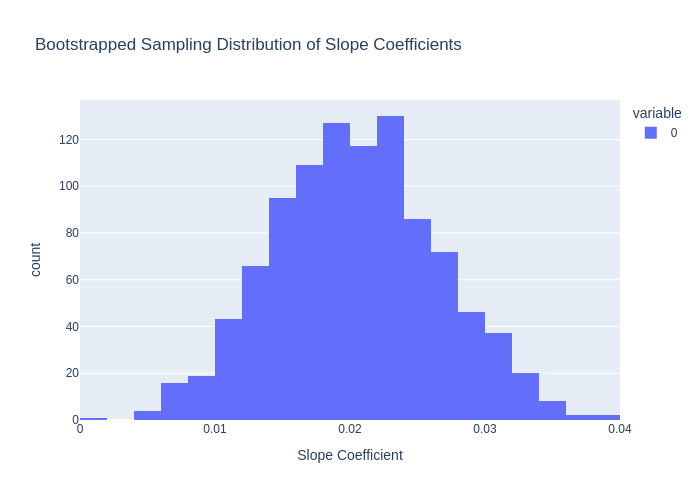

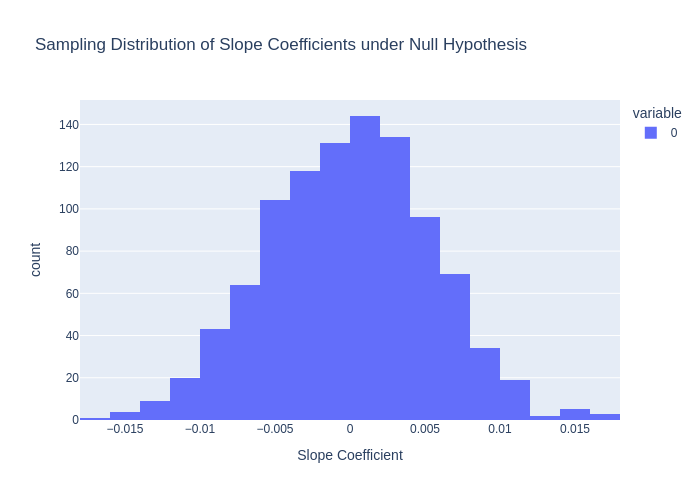

95% Bootstrapped Confidence Interval for Slope: [0.00853184719920705, 0.032428454784645865]
Does the 95% CI contain 0? No
Simulated p-value: 0.0
Observed p-value from model: 0.00032000147613835285


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import plotly.express as px

# Load the Old Faithful dataset and filter for long wait times
old_faithful = sns.load_dataset('geyser')
long_wait_limit = 70  # Threshold for long wait times
long_wait = old_faithful[old_faithful['waiting'] >= long_wait_limit]

# Set up parameters for simulations
n_samples = 160
n_bootstraps = 1000  # Number of bootstrap samples
beta_0 = 1.65
beta_1 = 0
sigma = 0.37

# Prepare arrays to collect slope coefficients
boot_slope_coeffs = []
null_slope_coeffs = []

# Step 1: Generate bootstrap samples, fit models, and collect slope coefficients
for _ in range(n_bootstraps):
    bootstrap_sample = long_wait.sample(n=n_samples, replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    boot_slope_coeffs.append(model.params['waiting'])

# Visualize the bootstrap distribution of slope coefficients
fig_bootstrap = px.histogram(
    boot_slope_coeffs, nbins=30, title="Bootstrapped Sampling Distribution of Slope Coefficients",
    labels={'value': 'Slope Coefficient', 'count': 'Frequency'}
)
fig_bootstrap.show(renderer="png")  # Use `renderer="png"` if needed for static submission

# Step 2: Generate slope coefficients for samples under the null hypothesis
for _ in range(n_bootstraps):
    # Sample 160 entries to match n_samples
    long_wait_sample = long_wait.sample(n=n_samples, replace=True)
    simulated_Y = beta_0 + beta_1 * long_wait_sample['waiting'] + np.random.normal(0, sigma, size=n_samples)
    simulated_data = pd.DataFrame({'waiting': long_wait_sample['waiting'], 'duration': simulated_Y})
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    null_slope_coeffs.append(model.params['waiting'])

# Visualize the null distribution of slope coefficients
fig_null = px.histogram(
    null_slope_coeffs, nbins=30, title="Sampling Distribution of Slope Coefficients under Null Hypothesis",
    labels={'value': 'Slope Coefficient', 'count': 'Frequency'}
)
fig_null.show(renderer="png")

# Step 3: Calculate 95% Confidence Interval and p-value
# Calculate the 95% confidence interval from bootstrapped slopes
lower_bound = np.percentile(boot_slope_coeffs, 2.5)
upper_bound = np.percentile(boot_slope_coeffs, 97.5)
print(f"95% Bootstrapped Confidence Interval for Slope: [{lower_bound}, {upper_bound}]")

# Check if 0 is within the confidence interval
contains_zero = lower_bound <= 0 <= upper_bound
print(f"Does the 95% CI contain 0? {'Yes' if contains_zero else 'No'}")

# Calculate the p-value from the null distribution
observed_slope = smf.ols('duration ~ waiting', data=long_wait).fit().params['waiting']
null_p_value = (np.sum(np.array(null_slope_coeffs) >= observed_slope) / n_bootstraps)
print(f"Simulated p-value: {null_p_value}")

# Compare with p-value from model fitted on long wait data
long_wait_model = smf.ols('duration ~ waiting', data=long_wait).fit()
observed_p_value = long_wait_model.pvalues['waiting']
print(f"Observed p-value from model: {observed_p_value}")


The bootstrapped confidence interval, simulated null distribution p-value, and model’s observed p-value all provide strong evidence that the relationship between waiting and duration is statistically significant for long wait times. This analysis indicates that, even with repeated sampling, a positive association between waiting and duration is unlikely to be due to random chance.

## 11

In [9]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define wait time categories and create an indicator variable for "long" waits (1 if "long", 0 if "short")
old_faithful['long_wait'] = (old_faithful['waiting'] >= 68).astype(int)

# Specify and fit the Simple Linear Regression model using the indicator variable
model = smf.ols('duration ~ long_wait', data=old_faithful).fit()

# Display the summary of the fitted model
print(model.summary())

# Interpretation of the Model
print("\nInterpretation:")
print("The intercept represents the mean eruption duration for short wait times (waiting < 68 minutes).")
print("The coefficient for 'long_wait' indicates the average difference in eruption duration between long (>=68 minutes) and short waits.")
print("A positive coefficient suggests that long waits tend to result in longer eruptions, while a negative one would suggest the opposite.")


                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1803.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          1.60e-121
Time:                        13:43:26   Log-Likelihood:                -144.19
No. Observations:                 272   AIC:                             292.4
Df Residuals:                     270   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0943      0.041     50.752      0.0

The new model uses an indicator variable to distinguish between long and short wait times, facilitating a direct comparison of the average differences between the two groups, whereas the previous model focused on the linear relationship of wait times. By introducing an indicator variable, the new model provides a more comprehensive analysis of how wait time categories impact eruption duration. The results indicate that long wait times significantly increase eruption duration, supporting the conclusion that "the longer the wait, the longer the eruption duration."

## 12

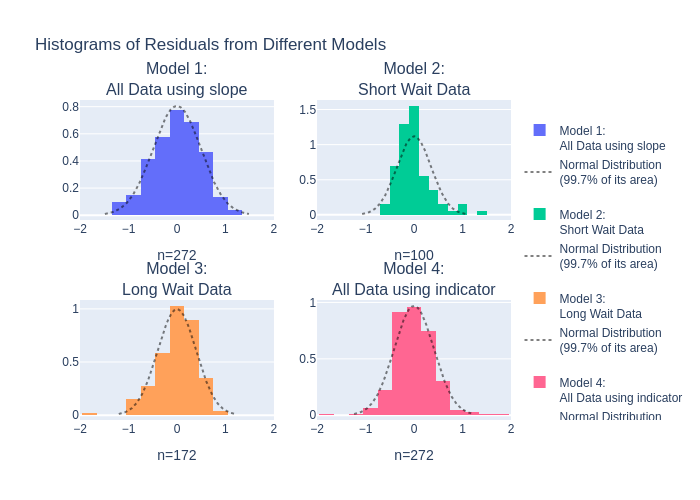

In [15]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns

# Load dataset
old_faithful = sns.load_dataset('geyser')

# Create indicator variable for "long wait" (wait time >= 68)
old_faithful['long_wait'] = (old_faithful['waiting'] >= 68).astype(int)
short_wait = old_faithful['waiting'] < 68
long_wait = old_faithful['waiting'] >= 68

# Calculate residuals from different models
model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ long_wait', data=old_faithful).fit().resid
}

# Create subplots with titles for each model
fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))

for i, (title, resid) in enumerate(model_residuals.items()):
    row = int(i / 2) + 1
    col = (i % 2) + 1

    # Set custom bin sizes
    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    # Add histogram of residuals
    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=row, col=col)
    fig.update_xaxes(title_text="n=" + str(len(resid)), row=row, col=col)

    # Overlay normal distribution curve
    normal_range = np.arange(-3 * resid.std(), 3 * resid.std(), 0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=row, col=col)

# Layout and axis adjustments
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2, 2])
fig.show(renderer="png")  # Use `renderer="png"` for GitHub or MarkUs submissions


The histogram from Model 1 (All Data Using Slope) is most likely to support the normality assumption if it aligns well with the overlaid normal curve. In contrast, Models 2, 3, and 4 are less likely to support normality due to restricted data ranges (in Models 2 and 3) or the use of an indicator variable (in Model 4), both of which can introduce biases and non-normal patterns in the residuals.

## 13

### A

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Load dataset
old_faithful = sns.load_dataset('geyser')

# Define short and long wait groups
short_wait = old_faithful[old_faithful['waiting'] < 68]['duration']
long_wait = old_faithful[old_faithful['waiting'] >= 68]['duration']

# Observed difference in means
observed_diff = np.mean(long_wait) - np.mean(short_wait)

# Permutation test
n_permutations = 1000
permuted_diffs = []

combined_data = np.concatenate([short_wait, long_wait])
for _ in range(n_permutations):
    np.random.shuffle(combined_data)  # Shuffle the combined data
    new_short = combined_data[:len(short_wait)]
    new_long = combined_data[len(short_wait):]
    permuted_diff = np.mean(new_long) - np.mean(new_short)
    permuted_diffs.append(permuted_diff)

# Calculate p-value for the observed difference
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))
print(f"Observed Difference: {observed_diff}")
print(f"P-value from permutation test: {p_value}")


Observed Difference: 2.2036002325581396
P-value from permutation test: 0.0


### B

In [18]:
# Bootstrap Confidence Interval
n_bootstraps = 1000
bootstrapped_mean_diffs = []

for _ in range(n_bootstraps):
    boot_short = np.random.choice(short_wait, size=len(short_wait), replace=True)
    boot_long = np.random.choice(long_wait, size=len(long_wait), replace=True)
    mean_diff = np.mean(boot_long) - np.mean(boot_short)
    bootstrapped_mean_diffs.append(mean_diff)

# Calculate the 95% bootstrap confidence interval
conf_interval = np.quantile(bootstrapped_mean_diffs, [0.025, 0.975])
print(f"95% Bootstrap Confidence Interval for Difference in Means: {conf_interval}")


95% Bootstrap Confidence Interval for Difference in Means: [2.09966324 2.29839218]


### a

In the permutation test, we assume there is no difference between the two groups. By randomly shuffling the labels of "short wait" and "long wait," we generate a distribution of mean differences and calculate the p-value of the observed difference to assess significance. A small p-value suggests that the observed difference is unlikely due to chance, supporting a conclusion of significance. The bootstrap method, on the other hand, involves resampling within each group to generate a distribution of mean differences, which is then used to construct a 95% confidence interval. This interval provides a plausible range for the true mean difference, and if it does not include 0, it indicates a significant difference between the short and long wait groups.

### b

The permutation test, bootstrap confidence interval, and indicator variable model all assess group differences but use different approaches. The permutation test provides a p-value by shuffling labels, assuming no distribution, while the bootstrap confidence interval estimates a range of differences via resampling without normality assumptions. The indicator variable model, however, uses regression to estimate differences directly, relying on linearity and normality of residuals. The nonparametric methods are robust and ideal for hypothesis testing or estimation without strict distribution assumptions, unlike the regression-based indicator model.

## 14

Yes

Here's a summary of our discussion:

1. **Defining Short and Long Wait Times**: We redefined "short" wait times as those under 68 minutes and "long" wait times as those 68 minutes or more.

2. **Indicator Variable Model**: We examined a Simple Linear Regression model using an indicator variable for wait times (short vs. long). The intercept represents the mean eruption duration for short waits, and the indicator coefficient (contrast effect) represents the difference in mean duration between long and short waits.

3. **Permutation Test**:
   - We conducted a permutation test for \( H_0: \mu_{\text{short}} = \mu_{\text{long}} \), testing the hypothesis of no difference in eruption durations.
   - By shuffling the labels (short and long), we simulated the null distribution and calculated the p-value. The observed p-value was 0.0, indicating a statistically significant difference in durations.

4. **Bootstrap Confidence Interval**:
   - We created a 95% bootstrap confidence interval for the difference in means by resampling within each group. The resulting confidence interval did not include 0, supporting a significant difference between short and long wait durations.

5. **Comparison of Sampling Approaches**:
   - **Permutation Test**: A nonparametric method that provides a p-value by testing the null hypothesis of no difference.
   - **Bootstrap CI**: A nonparametric approach that estimates the range of plausible values for the difference in means.
   - **Indicator Variable Model**: A parametric regression-based approach that uses an indicator variable, assuming linearity and normal residuals, with a coefficient directly estimating the mean difference.

6. **Summary**:
   - The permutation test and bootstrap CI are flexible, nonparametric methods that are robust to non-normal data, suitable for testing and estimation, respectively.
   - The indicator variable model is a parametric approach that requires more assumptions but can provide richer insights within a regression framework if assumptions hold.

This discussion explored how these methods can each assess or estimate the difference in eruption durations based on wait times, highlighting their similarities, differences, and suitability depending on the data and objectives.

https://chatgpt.com/share/672cd13d-9c20-8000-9c74-a9807ee776df